In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("ratings.csv",header=0)
data

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [3]:

data= data[['userId','movieId','rating']]

data_values = data.values

# Изменение настроек вывода массивов NumPy для удобочитаемости
np.set_printoptions(suppress=True)  # Подавление экспоненциальной нотации

# Вывод массива с измененными настройками
print(data_values)

[[   1.    31.     2.5]
 [   1.  1029.     3. ]
 [   1.  1061.     3. ]
 ...
 [ 671.  6365.     4. ]
 [ 671.  6385.     2.5]
 [ 671.  6565.     3.5]]


In [4]:
#деление на тест и train
#!pip install scikit-surprise

from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)



In [5]:
data

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [6]:
unique_values = trainset['movieId'].nunique()
unique_values

8223

In [7]:
unique_values1 = trainset['userId'].nunique()
unique_values1

671

In [8]:
# items
# уникальные значения id фильма
items_set = set(trainset['movieId'])
items_dict = {item: iditem for item, iditem in zip(items_set, range(len(items_set)))}

print(f'Кол-во фильмов: {len(items_set)}')

Кол-во фильмов: 8223


In [9]:
# аналогично для users
users_set = set(trainset['userId'])
users_dict = {user: iduser for user, iduser in zip(users_set, range(len(users_set)))}
print(f'Кол-во пользователей: {len(users_set)}')

Кол-во пользователей: 671


In [10]:
# столбцы матрицы - фильмы
items = trainset['movieId'].map(items_dict)
# строки матрицы - пользователи
users = trainset['userId'].map(users_dict)
# значения для подстановки в матрицу
values = trainset.rating.tolist()

In [11]:
from scipy.sparse import csr_matrix

# матрица user_item
user_item = csr_matrix((values, (users, items)), shape=(len(users_set), len(items_set)))
user_item

<671x8223 sparse matrix of type '<class 'numpy.float64'>'
	with 75003 stored elements in Compressed Sparse Row format>

In [12]:
print(user_item)

  (0, 30)	2.5
  (0, 875)	3.0
  (0, 903)	3.0
  (0, 958)	2.0
  (0, 985)	4.0
  (0, 1072)	2.0
  (0, 1096)	2.0
  (0, 1102)	2.0
  (0, 1141)	2.0
  (0, 1168)	2.5
  (0, 1202)	1.0
  (0, 1619)	4.0
  (0, 1765)	4.0
  (0, 1810)	3.0
  (0, 1845)	2.0
  (0, 1924)	2.0
  (0, 2071)	2.5
  (0, 2503)	1.0
  (0, 3073)	3.0
  (1, 9)	4.0
  (1, 16)	5.0
  (1, 38)	5.0
  (1, 49)	4.0
  (1, 51)	3.0
  (1, 59)	3.0
  :	:
  (670, 3389)	4.0
  (670, 3393)	4.0
  (670, 3394)	4.5
  (670, 3600)	3.5
  (670, 3985)	4.0
  (670, 3989)	5.0
  (670, 3995)	5.0
  (670, 4041)	4.5
  (670, 4069)	4.0
  (670, 4079)	2.0
  (670, 4207)	2.0
  (670, 4259)	3.0
  (670, 4288)	4.0
  (670, 4307)	4.0
  (670, 4347)	4.5
  (670, 4361)	3.0
  (670, 4482)	4.0
  (670, 4557)	4.0
  (670, 4598)	3.5
  (670, 4631)	5.0
  (670, 4655)	4.0
  (670, 4657)	4.5
  (670, 4800)	2.5
  (670, 4858)	4.0
  (670, 4870)	2.5


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


# Surprise (scikit-surprise):

In [13]:
#Surprise (scikit-surprise):
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy



#rows, cols = user_item.nonzero()
#data_values = user_item.data
#data_list = list(zip(rows, cols, data_values))


reader = Reader(rating_scale=(1, 5))

# Используем метод load_from_df для создания объекта Dataset
data1 = Dataset.load_from_df(data, reader)
trainset1, testset1 = train_test_split(data1, test_size=0.25, random_state=68)
err = []

sim_options = {
    'name': 'msd',
    'user_based': False
}

model = KNNBasic(sim_options=sim_options)
model.fit(trainset1)

predictions = model.test(testset1)

rmse = accuracy.mae(predictions)                    
err.append(rmse)


Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7259


In [101]:
import pandas as pd

df = pd.DataFrame(data1.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])
print(df)

        user  item  rating timestamp
0          1    31     2.5      None
1          1  1029     3.0      None
2          1  1061     3.0      None
3          1  1129     2.0      None
4          1  1172     4.0      None
...      ...   ...     ...       ...
99999    671  6268     2.5      None
100000   671  6269     4.0      None
100001   671  6365     4.0      None
100002   671  6385     2.5      None
100003   671  6565     3.5      None

[100004 rows x 4 columns]


In [118]:
#Surprise (scikit-surprise):
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))

# Используем метод load_from_df для создания объекта Dataset
data1 = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)
trainset1, testset1 = train_test_split(data1, test_size=0.35, random_state=42)

alg = ['pearson_baseline', 'cosine', 'pearson','msd']
err = []




rs = []
    
for er in alg:
    sim_options = {
        'name': er,
        'user_based': True
    }
    print(er)
    model = KNNBasic(k=200,sim_options=sim_options)
    model.fit(trainset1)

    predictions = model.test(testset1)

    rmse = accuracy.rmse(predictions)
    err.append(rmse)

pearson_baseline
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0180
cosine
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0043
pearson
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0117
msd
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9880


In [ ]:
#Surprise (scikit-surprise):
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import SVD

reader = Reader(rating_scale=(1, 5))

# Используем метод load_from_df для создания объекта Dataset
data1 = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)
trainset1, testset1 = train_test_split(data1, test_size=0.35, random_state=42)

alg = ['pearson_baseline', 'cosine', 'pearson','msd']
err = []


algo = SVD()
algo.fit(trainset1)
predictions = algo.test(testset)
accuracy.mae(predictions)



rs = []
    
for er in alg:
    sim_options = {
        'name': er,
        'user_based': True
    }
    print(er)
    model = KNNBasic(k=200,sim_options=sim_options)
    model.fit(trainset1)

    predictions = model.test(testset1)

    rmse = accuracy.mae(predictions)
    err.append(rmse)

In [114]:
import pandas as pd

df = pd.DataFrame(data1.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])
print(df)

        user  item  rating timestamp
0          1    31     2.5      None
1          1  1029     3.0      None
2          1  1061     3.0      None
3          1  1129     2.0      None
4          1  1172     4.0      None
...      ...   ...     ...       ...
99999    671  6268     2.5      None
100000   671  6269     4.0      None
100001   671  6365     4.0      None
100002   671  6385     2.5      None
100003   671  6565     3.5      None

[100004 rows x 4 columns]


In [115]:
err

[0.7863535944505328,
 0.7780303151016517,
 0.7827476247021307,
 0.7619353126347134]

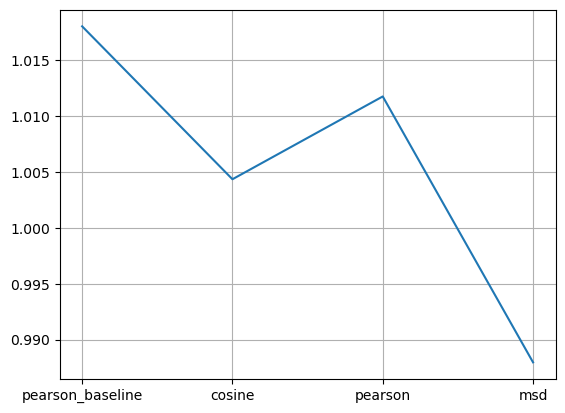

In [119]:
import matplotlib.pyplot as plt



plt.plot(alg, err)

plt.grid(True)
plt.show()

# ручная реализация:

In [27]:
Test = True #use test data for checking correction
ratings = None
table = [[5, 3, 0, 0, 4, 0, 0, 0, 0], 
         [4, 0, 0, 0, 0, 1, 0, 2, 3], 
         [0, 5, 5, 0, 0, 0, 0, 0, 0], 
         [0, 0, 4, 3, 0, 2, 1, 0, 0]]

res_users = [i + 1 for i in range(len(table))]
res_movies = [i + 1 for i in range(len(table[0]))]

csr_matrix_table = csr_matrix(table)

print(csr_matrix_table)

  (0, 0)	5
  (0, 1)	3
  (0, 4)	4
  (1, 0)	4
  (1, 5)	1
  (1, 7)	2
  (1, 8)	3
  (2, 1)	5
  (2, 2)	5
  (3, 2)	4
  (3, 3)	3
  (3, 5)	2
  (3, 6)	1


In [28]:
csr_matrix_table = csr_matrix(table)

# Извлечение данных, индексов и указателей
data = csr_matrix_table.data
indices = csr_matrix_table.indices
indptr = csr_matrix_table.indptr

# Создание DataFrame
df = pd.DataFrame({'userId': [], 'movieId': [], 'rating': []})

# Заполнение DataFrame данными из CSR-матрицы
for user_id, (start, end) in enumerate(zip(indptr[:-1], indptr[1:])):
    movie_ids = indices[start:end]
    ratings = data[start:end]
    user_data = pd.DataFrame({'userId': [user_id + 1] * len(movie_ids),
                              'movieId': movie_ids + 1,  # Добавляем 1, так как индексы начинаются с 1
                              'rating': ratings})
    df = pd.concat([df, user_data], ignore_index=True)

# Вывод DataFrame
print(df)


    userId  movieId  rating
0      1.0      1.0     5.0
1      1.0      2.0     3.0
2      1.0      5.0     4.0
3      2.0      1.0     4.0
4      2.0      6.0     1.0
5      2.0      8.0     2.0
6      2.0      9.0     3.0
7      3.0      2.0     5.0
8      3.0      3.0     5.0
9      4.0      3.0     4.0
10     4.0      4.0     3.0
11     4.0      6.0     2.0
12     4.0      7.0     1.0


In [29]:

res_data = df
matrix = pd.crosstab(res_data['userId'], res_data['movieId'], values=res_data['rating'], aggfunc="sum").fillna(0)
matrix

movieId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
userId,,,,,,,,,
1.0,5.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0
3.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,4.0,3.0,0.0,2.0,1.0,0.0,0.0


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import pairwise_distances, euclidean_distances, cosine_similarity
# оценить схожести между пользователями
movies = list(matrix.columns)
users = list(matrix[movies[0]].index)

r_users = pd.DataFrame(columns=['userId_1', 'userId_2', 'r'])

for i in range(len(users)):
    target_row = [matrix[movie][users[i]] for movie in movies]
    #u1 = getVector(users[i])
    for j in range(i + 1, len(users)):
        row = [matrix[movie][users[j]] for movie in movies]

        r = pairwise_distances([target_row], [row], metric='cosine')[0][0]
        r_users.loc[len(r_users.index)] = [users[i], users[j], r]
        r_users.loc[len(r_users.index)] = [users[j], users[i], r]

r_users

,userId_1,userId_2,r
0,1.0,2.0,0.483602
1,2.0,1.0,0.483602
2,1.0,3.0,0.700000
3,3.0,1.0,0.700000
4,1.0,4.0,1.000000
5,4.0,1.0,1.000000
6,2.0,3.0,1.000000
7,3.0,2.0,1.000000
8,2.0,4.0,0.933333
9,4.0,2.0,0.933333


In [31]:
def predicted(matrix, target_user, target_film):
    users = list(matrix[matrix.columns[0]].index)
    an_users = np.setdiff1d(users.copy(), [target_user])
    
    K = 3
    knn = {an_users[i]: r_users.loc[(r_users['userId_1'] == target_user) &
                       (r_users['userId_2'] == an_users[i]), 'r'].sum()
             for i in range(K)} 

    min_knn_key = min(knn, key=knn.get)

    for close in an_users[K:]:
        r = r_users.loc[(r_users['userId_1'] == target_user) &
                       (r_users['userId_2'] == close), 'r'].sum()

        if r > knn[min_knn_key]:
            knn.pop(min_knn_key)
            knn[close] = r
            min_knn_key = min(knn, key=knn.get)
            
    rm = sum(matrix[target_film][close] for close, si in knn.items()
              ) / len(knn) 
    suppose_r = rm + sum(si * (matrix[target_film][close] - rm) for close, si in knn.items()) / sum(knn.values())
    
    return suppose_r    

predicted(matrix, 2, 3)

3.6133910643424003

In [32]:
resolve = matrix.copy()
movies = matrix.columns
users = list(matrix[movies[0]].index)


for user in users:
    for movie in movies:
        if resolve[movie][user] == 0:
            resolve[movie][user] = predicted(matrix, user, movie)

resolve

movieId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
userId,,,,,,,,,
1.0,5.000000,3.000000,3.434692,1.373877,4.000000,1.137388,0.457959,0.442940,0.664410
2.0,4.000000,2.669002,3.613391,1.158492,0.800356,1.000000,0.386164,2.000000,3.000000
3.0,3.434692,5.000000,5.000000,0.664410,1.282285,0.900899,0.221470,0.915918,1.373877
4.0,3.613391,2.241686,4.000000,3.000000,1.654988,2.000000,1.000000,0.772328,1.158492
